In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('Tamil.jpg', cv2.IMREAD_GRAYSCALE)

## 1. Segmentation

### (i) Finding threshold using brightness histogram

In [3]:
hist, bins = np.histogram(image.flatten(), 256, [0,256])

In [4]:
total_pixels = image.shape[0] * image.shape[1]
sum_b = 0
weight_b = 0
var_max = 0

In [5]:
for t in range(256):
    weight_b += hist[t]
    if weight_b == 0:
        continue
    weight_f = total_pixels - weight_b
    if weight_f == 0:
        break
    sum_b += t * hist[t]
    mean_b = sum_b/weight_b
    mean_f = (sum(hist * np.arange(256)) - sum_b)/weight_f

    var_between = weight_b * weight_f * ((mean_b - mean_f)/total_pixels) ** 2
    if var_between > var_max:
        var_max = var_between
        threshold = t

In [6]:
binary_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)[1]

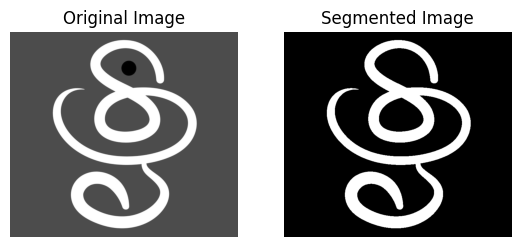

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Segmented Image')
plt.imshow(binary_threshold, cmap='gray')
plt.axis('off')

plt.show()

### (ii) Adaptive Threshold

In [8]:
binary_adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

(-0.5, 733.5, 660.5, -0.5)

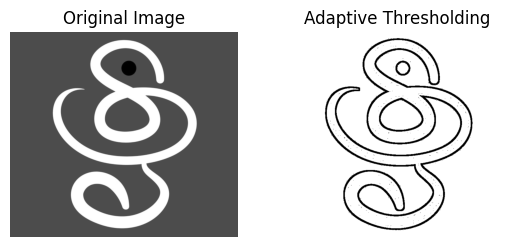

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Adaptive Thresholding')
plt.imshow(binary_adaptive, cmap='gray')
plt.axis('off')

### (iii) Watershed Algorithm

In [21]:
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

blurred = cv2.GaussianBlur(image, (5, 5), 0)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
segmented = image
segmented[markers == -1] = [0, 0, 255]

(-0.5, 733.5, 660.5, -0.5)

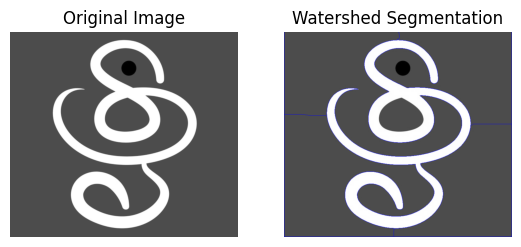

In [16]:
image = cv2.imread('Tamil.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Watershed Segmentation')
plt.imshow(segmented, cmap='gray')
plt.axis('off')

## 2. Morphological Transformations

### (i) Erosion and Dilation with a Circular structuring element

In [26]:
circular_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
circular_result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, circular_kernel, iterations=2)

array([[[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       ...,

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]]], dtype=uint8)
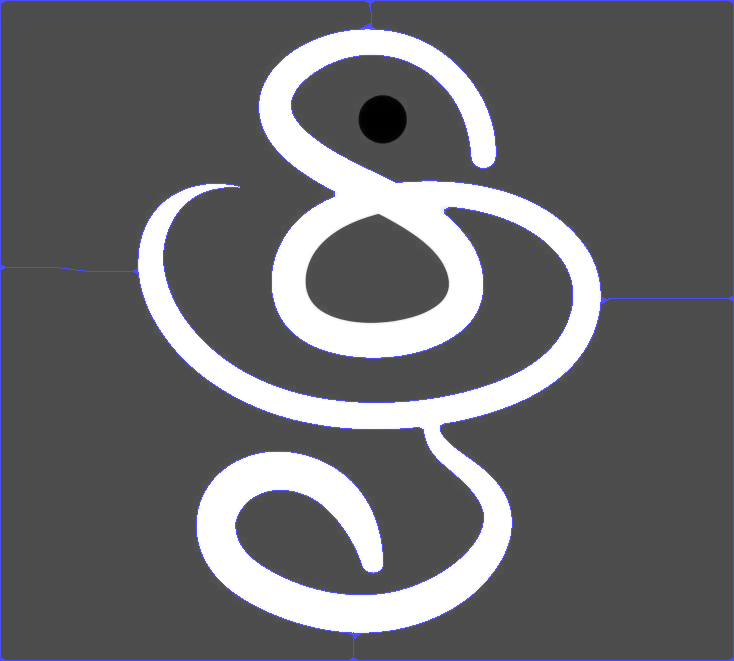

In [27]:
circular_result

### (ii) Erosion and Dilation with a Square structuring element

In [28]:
square_kernel = np.ones((5, 5), np.uint8)
square_result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, square_kernel, iterations=2)

array([[[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76, 255]],

       ...,

       [[ 76,  76, 255],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]]], dtype=uint8)
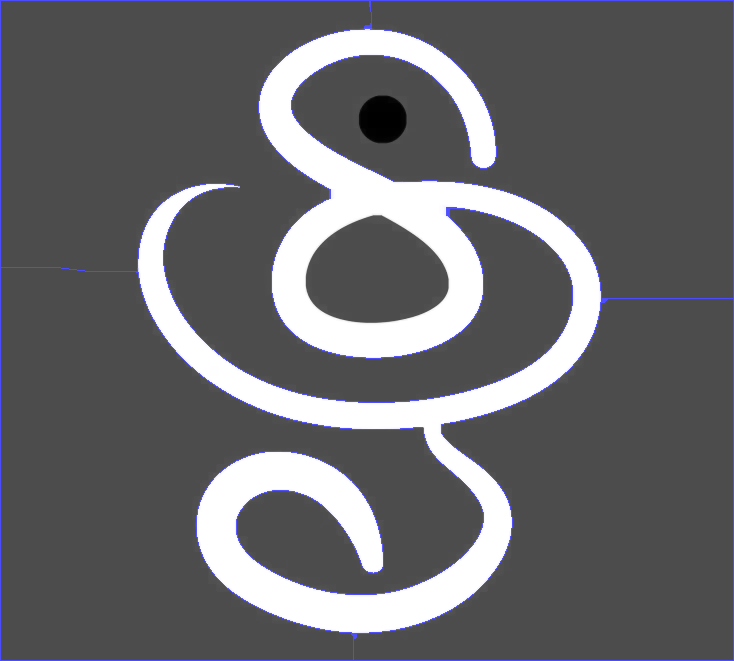

In [29]:
square_result

### (iii) Erosion and Dilation with a Cross Shaped structuring element

In [30]:
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
closing_result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, cross_kernel, iterations=2)
opening_result = cv2.morphologyEx(image, cv2.MORPH_OPEN, cross_kernel, iterations=2)

array([[[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       ...,

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]],

       [[ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255],
        ...,
        [ 76,  76, 255],
        [ 76,  76, 255],
        [ 76,  76, 255]]], dtype=uint8)
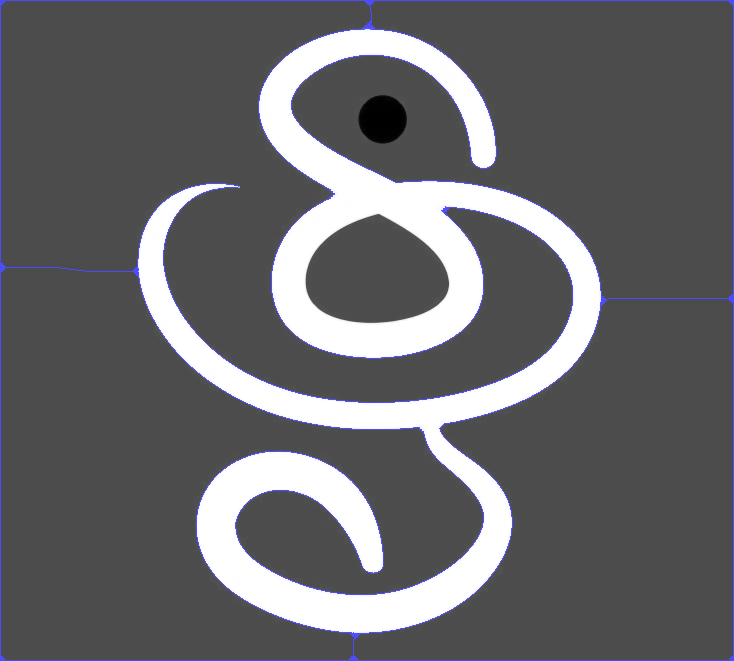

In [32]:
closing_result

array([[[ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76],
        ...,
        [ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76]],

       [[ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76],
        ...,
        [ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76]],

       [[ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76],
        ...,
        [ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76]],

       ...,

       [[ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76],
        ...,
        [ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76]],

       [[ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76],
        ...,
        [ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76]],

       [[ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76],
        ...,
        [ 0,  0, 76],
        [ 0,  0, 76],
        [ 0,  0, 76]]], dtype=uint8)
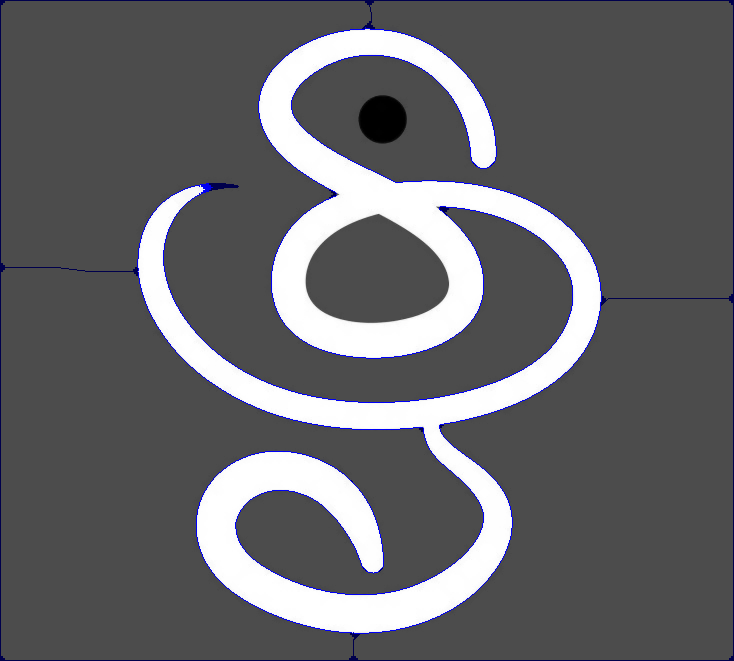

In [33]:
opening_result

## 3. Generating mask of the veins

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
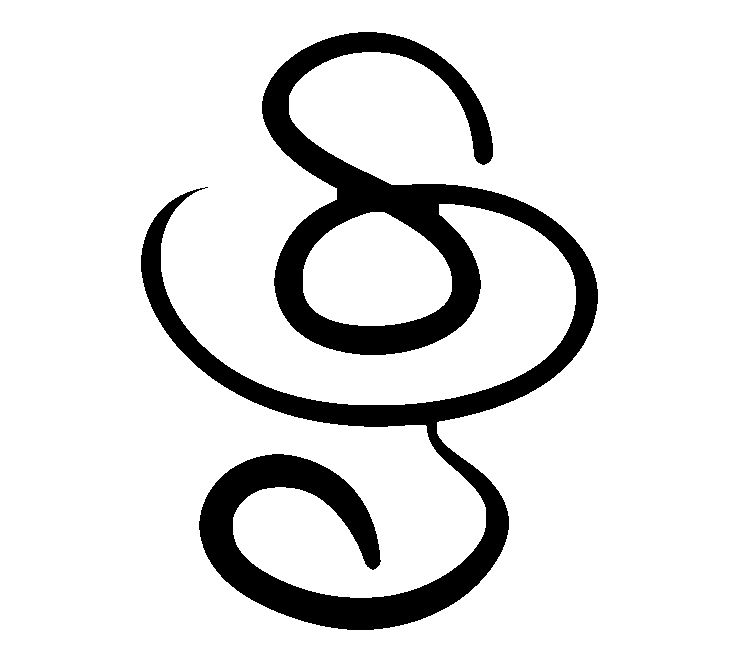

In [36]:
sure_bg